In [2]:
# !wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
len(words)

32033

In [6]:
min([len(word) for word in words])

2

In [7]:
max([len(word) for word in words])

15

In [13]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a


In [14]:
w

'emma'

In [15]:
w[1:]

'mma'

In [16]:
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [23]:
b = {}
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [24]:
b

{('<S>', 'e'): 1, ('e', 'm'): 1, ('m', 'm'): 1, ('m', 'a'): 1, ('a', '<E>'): 1}

In [25]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [27]:
b.items()

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [28]:
sorted(b.items(), key=lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [29]:
import torch

In [60]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [53]:
chars = sorted(list(set(''.join(words))))
print(chars)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [59]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [61]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

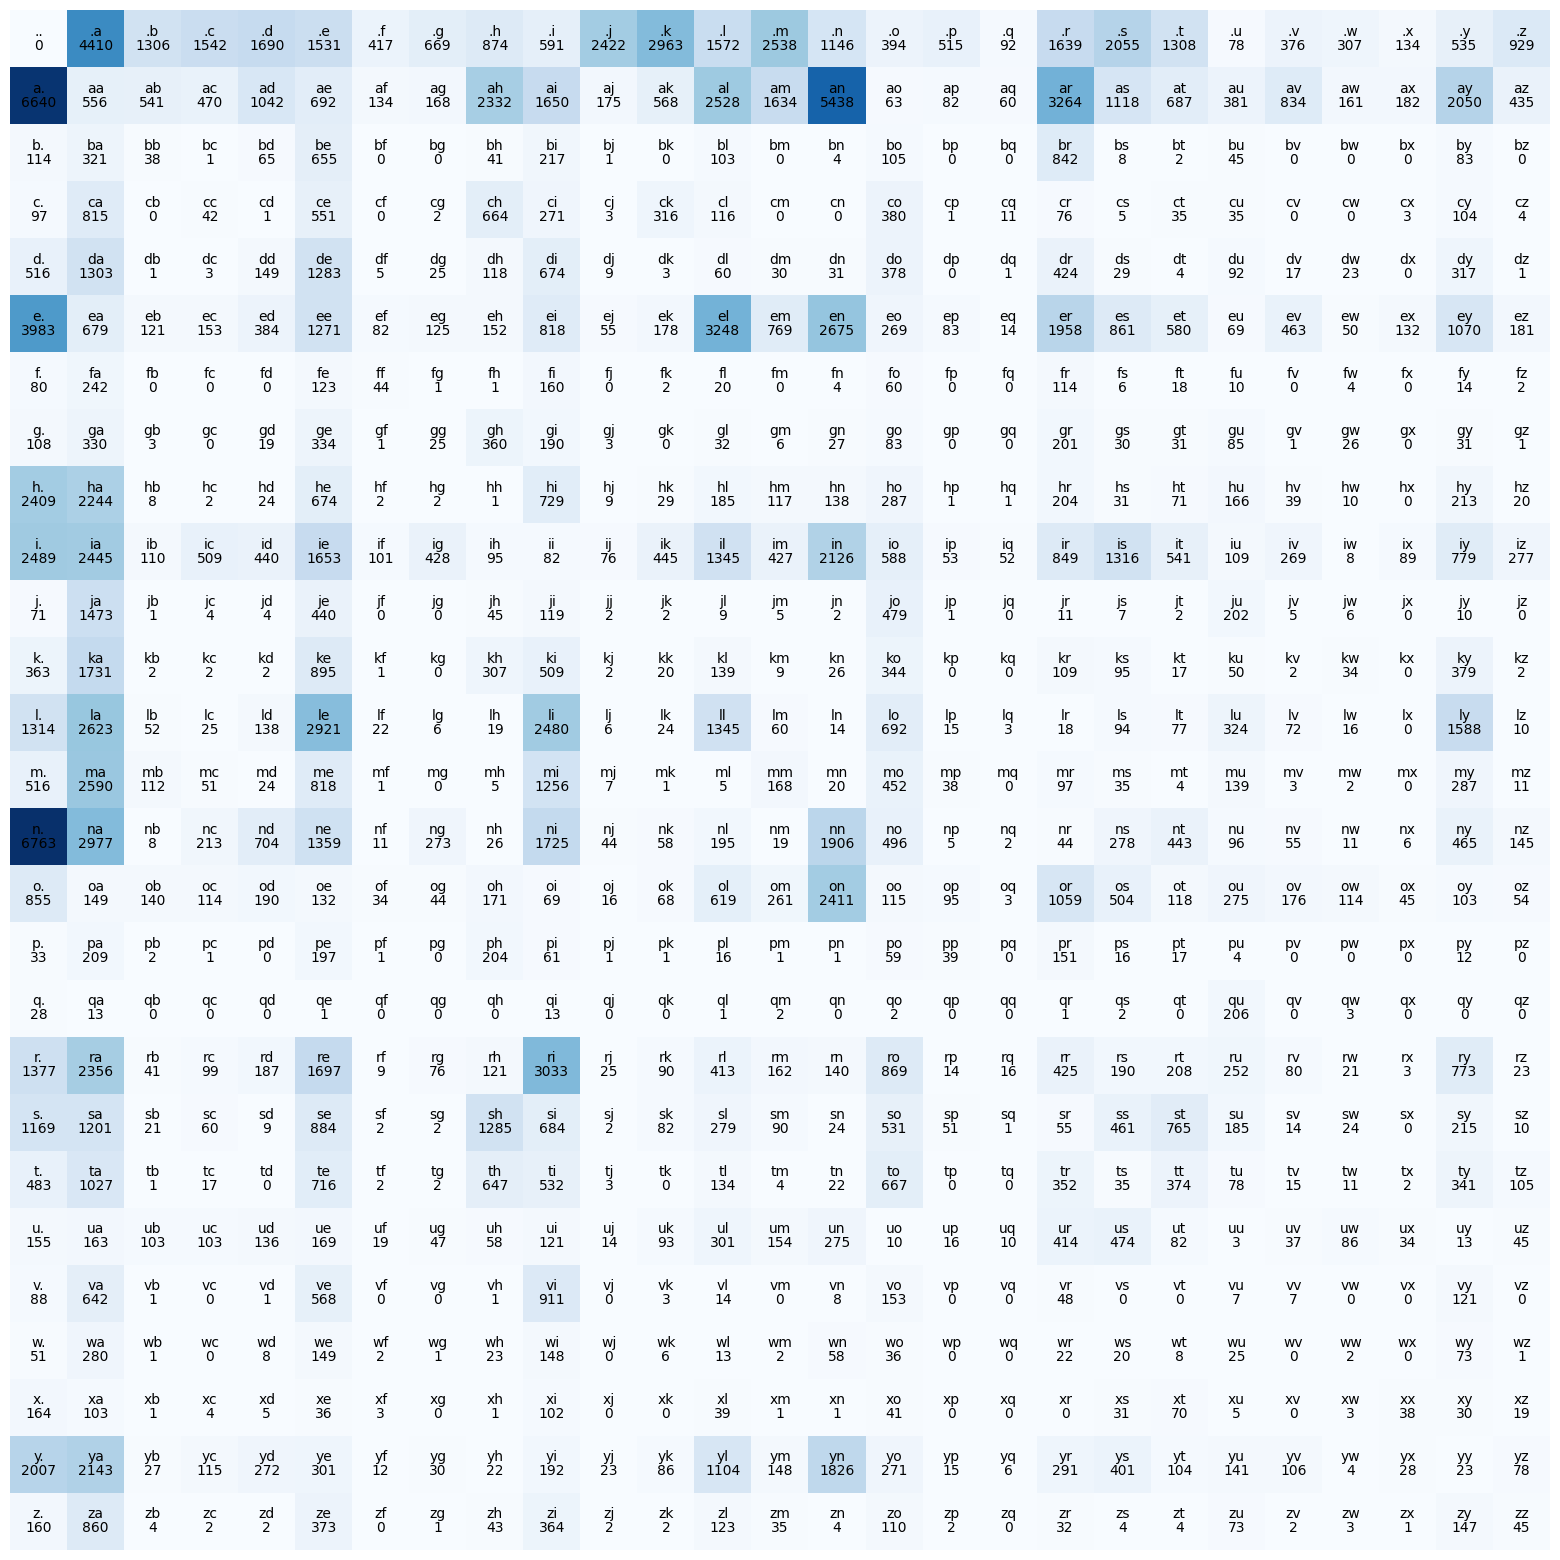

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='black')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='black')
plt.axis('off');

In [67]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [69]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [72]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [75]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [76]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'a'

In [92]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:
    p = N[ix].float()  # Get the row. Why? Because we want to sample from the distribution
    p = p / p.sum()  # Normalize
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # Sample
    out.append(itos[ix])  # This will contain one character
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [93]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:
    p = torch.ones(27) / 27 # this is a uniform distribution
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # Sample
    out.append(itos[ix])  # This will contain one character
    if ix == 0:
      break
  print(''.join(out))

qvsaayxbqrqmyqwuznivanukotdjvdhd.
qnoymtzduqkatdetkpfjdgigvlejfkrsqlwnirghhzwlu.
idcx.
cekmzucjnjoeovjvrggqrjr.
cfbhabkslpokc.


In [95]:
P = N.float()
P.sum(dim=0, keepdim=True).shape

torch.Size([1, 27])

In [100]:
P.sum(dim=0).shape # loses the dimension

torch.Size([27])

In [101]:
P.sum(dim=1, keepdim=True).shape # column vector

torch.Size([27, 1])

In [153]:
P = (N+1).float() # fake counts to avoid weird -inf log probabilities (model smoothing)
P /= P.sum(dim=1, keepdim=True) # broadcasting will take care of this, inplace for memory efficiency
P.shape

torch.Size([27, 27])

In [154]:
P[0].sum() # should be 1

tensor(1.)

In [155]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # Sample
    out.append(itos[ix])  # This will contain one character
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


## GOAL: maximize likelihood of the data w.r.t. model parameters (the table)
### equivalent to maximizing the log likelihood (because log is monotonic)
### equivalent to minimizing the negative log likelihood
### equivalent to minimizing the average negative log likelihood

### log(a*b*c) = log(a) + log(b) + log(c)

In [158]:
log_likelihood = 0.0
n = 0

for w in words[:3]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{ch1} -> {ch2} : {prob:.3f} : {logprob:.3f}')
print(f'{log_likelihood:.3f}')
nll = -log_likelihood / n
print(f'{nll:.3f}')

. -> e : 0.048 : -3.041
e -> m : 0.038 : -3.279
m -> m : 0.025 : -3.675
m -> a : 0.389 : -0.945
a -> . : 0.196 : -1.631
. -> o : 0.012 : -4.396
o -> l : 0.078 : -2.553
l -> i : 0.177 : -1.729
i -> v : 0.015 : -4.184
v -> i : 0.351 : -1.048
i -> a : 0.138 : -1.981
a -> . : 0.196 : -1.631
. -> a : 0.138 : -1.984
a -> v : 0.025 : -3.704
v -> a : 0.247 : -1.397
a -> . : 0.196 : -1.631
-38.809
2.426


In [136]:
1/27 # every set of chars being equally likely would yield ~ 4%, os the model did learn something

0.037037037037037035

## Neural Network Language Model

In [159]:
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [163]:
xs

tensor([ 0,  5, 13, 13,  1])

In [161]:
ys

tensor([ 5, 13, 13,  1,  0])

In [167]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [168]:
xenc.shape

torch.Size([5, 27])

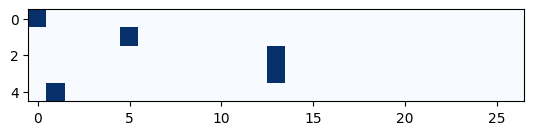

In [169]:
plt.imshow(xenc, cmap='Blues')

In [170]:
xenc.dtype

torch.float32

In [172]:
W = torch.randn((27, 1), requires_grad=True)
xenc @ W

tensor([[-0.3564],
        [ 0.6196],
        [ 1.9499],
        [ 1.9499],
        [ 0.7639]], grad_fn=<MmBackward0>)

In [173]:
W = torch.randn((27, 27), requires_grad=True) # this evaluates all 27 outputs at once
xenc @ W

tensor([[ 0.5391, -1.3424,  1.2925, -0.2610,  0.8626, -1.1769,  0.6663,  1.3937,
          0.0082, -1.2180, -0.5202,  1.1797,  1.3885,  0.5499, -1.4442, -0.5099,
          0.8879,  0.4746, -0.1877, -1.5881,  1.5145, -0.0037,  0.4834,  0.3933,
         -0.8840, -0.4010,  0.6608],
        [ 1.6777,  1.2681,  0.2976, -0.6723, -0.3651,  0.2533, -1.2613, -2.6038,
         -1.2564,  0.3897,  1.0966,  0.3869,  0.9218,  1.2012,  0.4361,  1.3586,
          0.5846,  1.1261, -0.1402,  0.2997, -1.2385,  1.2609, -0.6723, -0.8720,
         -1.2236,  0.5091,  0.8276],
        [ 0.7069,  0.8435,  0.6503, -0.2744, -0.7833,  0.0111, -1.1449, -1.7670,
          0.8003, -0.4216, -1.0083,  1.2240, -0.3703, -1.9510, -0.5832,  1.2024,
          0.5287, -0.0383, -1.5354, -0.0923,  1.2786, -0.9080,  1.7696, -0.9519,
         -0.0194,  0.4066, -0.9927],
        [ 0.7069,  0.8435,  0.6503, -0.2744, -0.7833,  0.0111, -1.1449, -1.7670,
          0.8003, -0.4216, -1.0083,  1.2240, -0.3703, -1.9510, -0.5832,  1.2024

In [174]:
(xenc @ W).shape  # what is the firing rate of each output neuron for each of the 5 inputs?

torch.Size([5, 27])

In [177]:
(xenc @ W)[3, 13]  # the firing rate of the 13th output neuron for the 4th input

tensor(-1.9510, grad_fn=<SelectBackward0>)

In [180]:
(xenc[3] * W[:, 13]).sum()  # the firing rate of the 13th output neuron for the 4th input

tensor(-1.9510, grad_fn=<SumBackward0>)

In [181]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [182]:
W[:, 13]

tensor([ 0.5499, -1.7090, -2.8331, -1.9413, -0.1514,  1.2012, -0.8088,  1.6893,
        -1.4744,  2.3755,  0.1474,  0.2112, -0.4638, -1.9510, -1.8719, -0.1064,
         0.8832, -1.1849,  0.3924, -0.4388, -0.6016,  0.0213,  0.7055, -2.4664,
        -2.1949,  0.5729, -1.1439], grad_fn=<SelectBackward0>)

### (5, 27) @ (27, 27) -> (5, 27)

But what would the 27 outputs be?
They cannot be counts, since those are integers.
They cannot be probabilities, since they are not normalized.
They cannot be log counts, since they are not normalized.

In [183]:
(xenc @ W).exp()

tensor([[1.7145, 0.2612, 3.6419, 0.7703, 2.3692, 0.3082, 1.9470, 4.0297, 1.0083,
         0.2958, 0.5944, 3.2535, 4.0087, 1.7330, 0.2359, 0.6006, 2.4301, 1.6073,
         0.8289, 0.2043, 4.5472, 0.9963, 1.6215, 1.4819, 0.4131, 0.6696, 1.9363],
        [5.3530, 3.5541, 1.3466, 0.5105, 0.6941, 1.2883, 0.2833, 0.0740, 0.2847,
         1.4765, 2.9940, 1.4724, 2.5138, 3.3242, 1.5467, 3.8909, 1.7943, 3.0838,
         0.8692, 1.3494, 0.2898, 3.5287, 0.5105, 0.4181, 0.2942, 1.6637, 2.2878],
        [2.0277, 2.3245, 1.9161, 0.7600, 0.4569, 1.0111, 0.3183, 0.1708, 2.2263,
         0.6560, 0.3648, 3.4007, 0.6905, 0.1421, 0.5581, 3.3281, 1.6967, 0.9624,
         0.2154, 0.9118, 3.5917, 0.4033, 5.8684, 0.3860, 0.9808, 1.5017, 0.3706],
        [2.0277, 2.3245, 1.9161, 0.7600, 0.4569, 1.0111, 0.3183, 0.1708, 2.2263,
         0.6560, 0.3648, 3.4007, 0.6905, 0.1421, 0.5581, 3.3281, 1.6967, 0.9624,
         0.2154, 0.9118, 3.5917, 0.4033, 5.8684, 0.3860, 0.9808, 1.5017, 0.3706],
        [2.7115, 1.7761,

In [185]:
logits = (xenc @ W)  # log-counts
counts = logits.exp()  # equivalent to the N
probs = counts / counts.sum(dim=1, keepdim=True)  # equivalent to the P
probs

tensor([[0.0394, 0.0060, 0.0837, 0.0177, 0.0545, 0.0071, 0.0447, 0.0926, 0.0232,
         0.0068, 0.0137, 0.0748, 0.0921, 0.0398, 0.0054, 0.0138, 0.0559, 0.0369,
         0.0191, 0.0047, 0.1045, 0.0229, 0.0373, 0.0341, 0.0095, 0.0154, 0.0445],
        [0.1146, 0.0761, 0.0288, 0.0109, 0.0149, 0.0276, 0.0061, 0.0016, 0.0061,
         0.0316, 0.0641, 0.0315, 0.0538, 0.0712, 0.0331, 0.0833, 0.0384, 0.0660,
         0.0186, 0.0289, 0.0062, 0.0756, 0.0109, 0.0090, 0.0063, 0.0356, 0.0490],
        [0.0544, 0.0624, 0.0515, 0.0204, 0.0123, 0.0272, 0.0085, 0.0046, 0.0598,
         0.0176, 0.0098, 0.0913, 0.0185, 0.0038, 0.0150, 0.0894, 0.0456, 0.0258,
         0.0058, 0.0245, 0.0964, 0.0108, 0.1576, 0.0104, 0.0263, 0.0403, 0.0100],
        [0.0544, 0.0624, 0.0515, 0.0204, 0.0123, 0.0272, 0.0085, 0.0046, 0.0598,
         0.0176, 0.0098, 0.0913, 0.0185, 0.0038, 0.0150, 0.0894, 0.0456, 0.0258,
         0.0058, 0.0245, 0.0964, 0.0108, 0.1576, 0.0104, 0.0263, 0.0403, 0.0100],
        [0.0742, 0.0486,

In [188]:
probs[0].shape

torch.Size([27])

In [186]:
probs[0].sum()

tensor(1.0000, grad_fn=<SumBackward0>)

In [187]:
probs.shape

torch.Size([5, 27])

In [189]:
xs

tensor([ 0,  5, 13, 13,  1])

In [190]:
ys

tensor([ 5, 13, 13,  1,  0])

In [191]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [192]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [193]:
probs.shape

torch.Size([5, 27])

In [194]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [195]:
xs

tensor([ 0,  5, 13, 13,  1])

In [196]:
ys

tensor([ 5, 13, 13,  1,  0])

In [197]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [198]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [199]:
print(loss.item())

3.7693049907684326


In [200]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward() # compute the gradient

In [201]:
W.data += -0.1 * W.grad

In [253]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [254]:
# gradient descent
for k in range(100):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += - 50 * W.grad

3.7686190605163574
3.378786325454712
3.1610782146453857
3.027181386947632
2.9344804286956787
2.8672285079956055
2.816652774810791
2.7771458625793457
2.745253562927246
2.7188308238983154
2.696505546569824
2.677372694015503
2.6608054637908936
2.6463515758514404
2.6336653232574463
2.622471570968628
2.6125476360321045
2.6037065982818604
2.595794439315796
2.5886807441711426
2.5822560787200928
2.5764293670654297
2.5711233615875244
2.566272735595703
2.5618226528167725
2.5577261447906494
2.5539441108703613
2.550442695617676
2.547192335128784
2.5441696643829346
2.5413522720336914
2.538721799850464
2.536261796951294
2.5339581966400146
2.5317976474761963
2.5297679901123047
2.527860164642334
2.526063919067383
2.5243704319000244
2.522773027420044
2.52126407623291
2.519836664199829
2.5184857845306396
2.5172054767608643
2.515990972518921
2.5148372650146484
2.5137407779693604
2.51269793510437
2.511705160140991
2.5107581615448
2.509854793548584
2.5089921951293945
2.5081686973571777
2.507380485534668
2.

In [255]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.


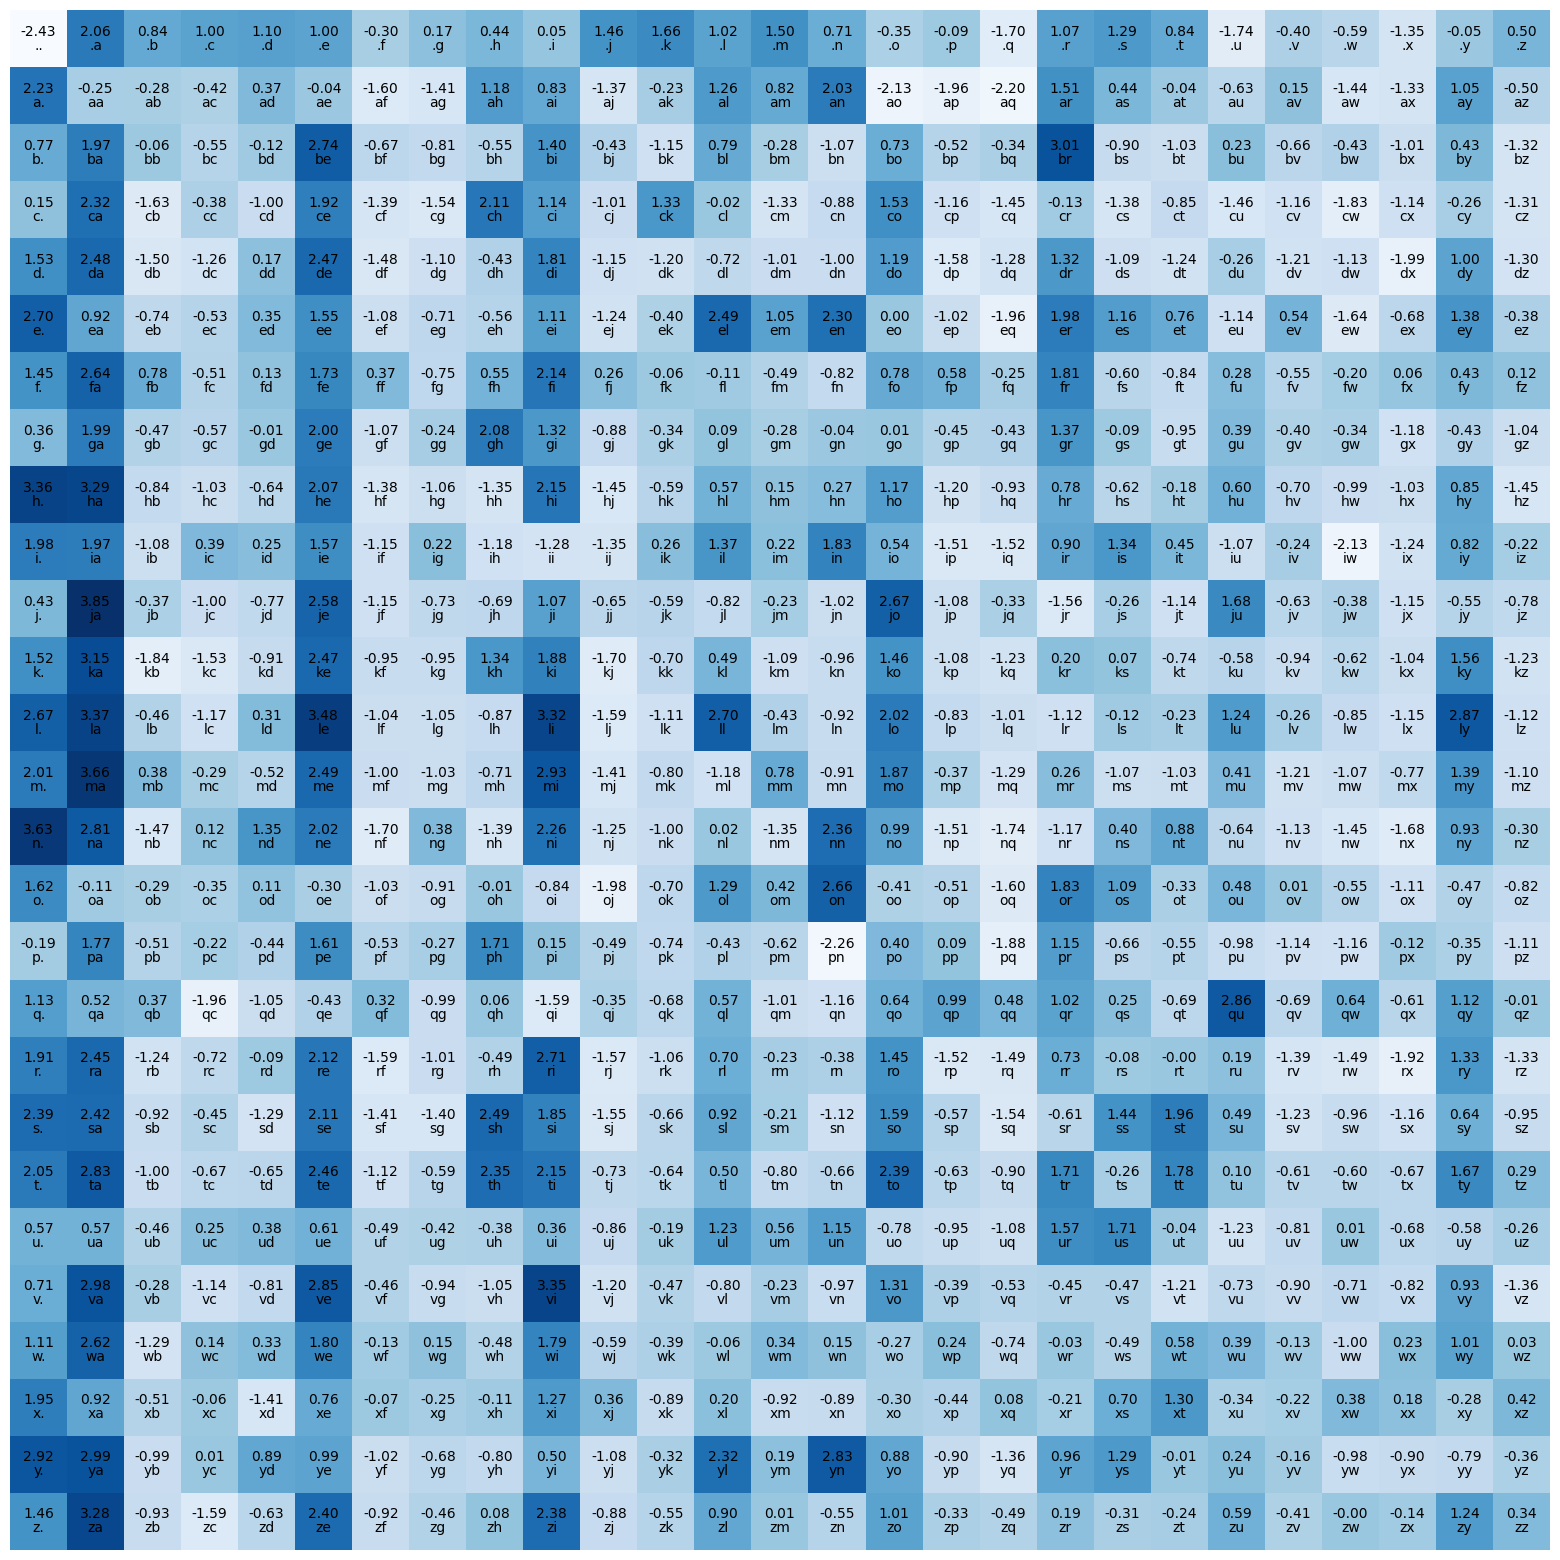

In [263]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
plt.imshow(W.detach().numpy(), cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="top", color='black')
        plt.text(j, i, f'{W[i, j]:.2f}', ha='center', va='bottom', color='black')
plt.axis('off');